# ARIMA

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

In [2]:
df = pd.read_csv('datasets/2/Electric_Production.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index(['DATE'])
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [3]:
train_df = pd.DataFrame(df[:int(0.8 * len(df))])
test_df = pd.DataFrame(df[int(0.8 * len(df)):])

In [4]:
len(train_df), len(test_df), len(df)

(317, 80, 397)

<Axes: xlabel='DATE'>

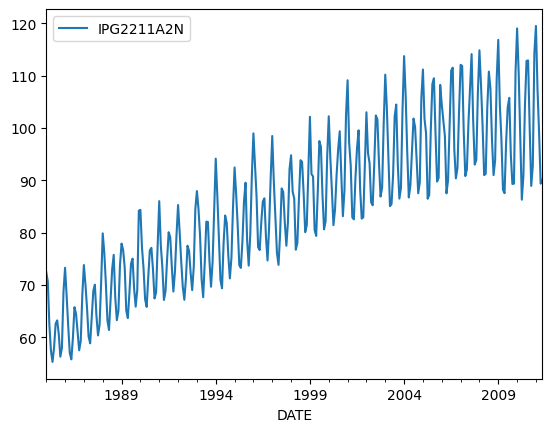

In [5]:
train_df.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
adfuller(train_df)[1]

0.4112939344557697

<Axes: xlabel='DATE'>

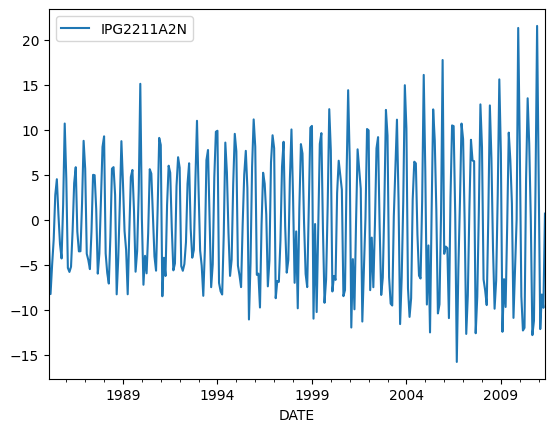

In [8]:
df_train_diff = train_df.diff().dropna()
df_train_diff.plot()

In [9]:
adfuller(df_train_diff)[1]

2.5832755038271256e-08

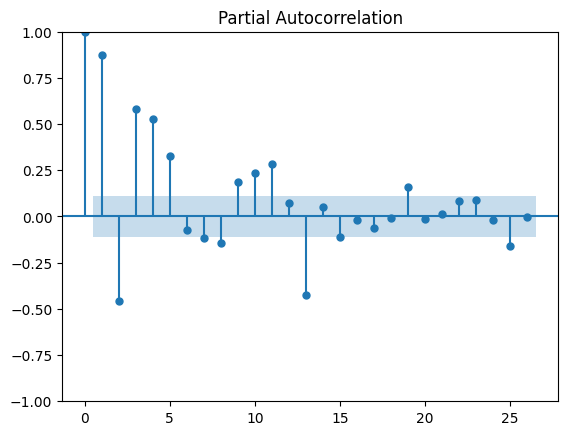

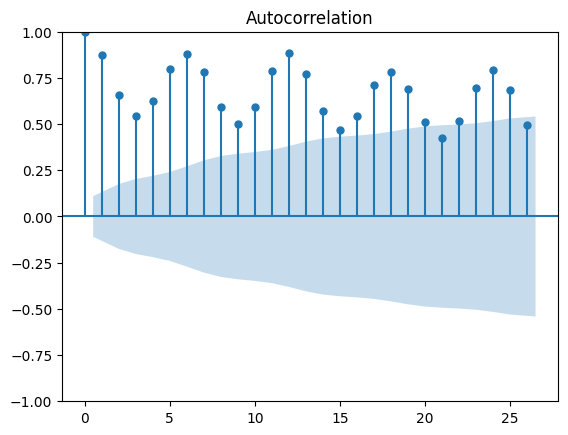

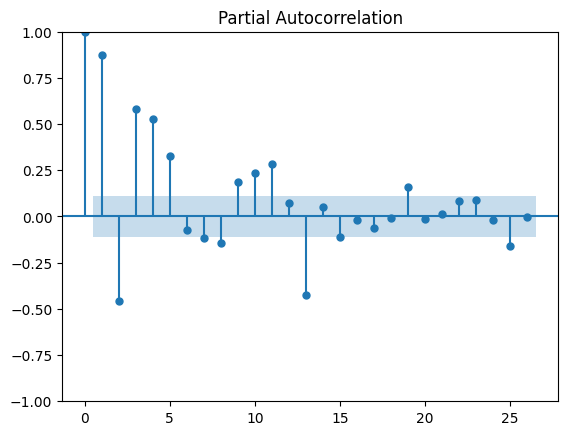

In [10]:
plot_acf(train_df)
plot_pacf(train_df)

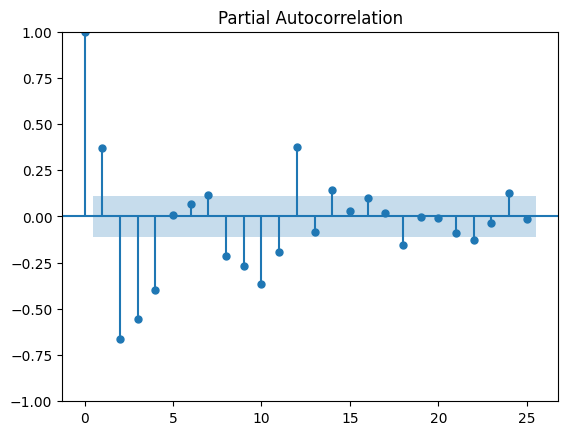

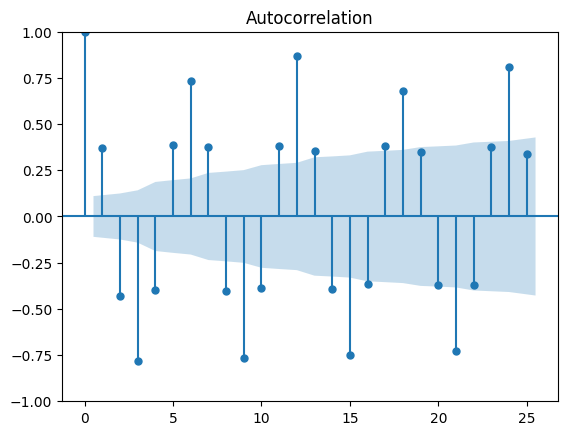

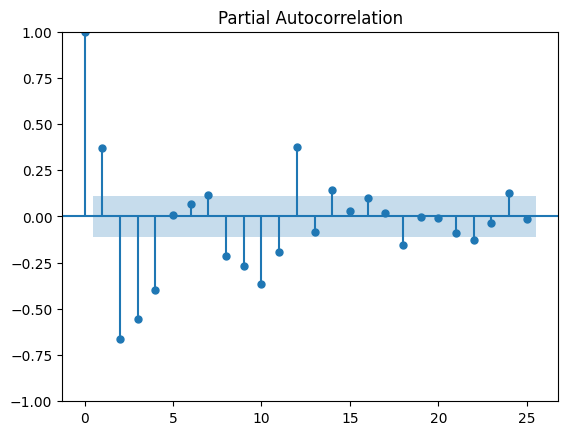

In [11]:
plot_acf(df_train_diff)
plot_pacf(df_train_diff)

In [12]:
# d = 1

# p = 2?

# q = 4?

In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
model = ARIMA(train_df, order = (2,1,5))
model_fit = model.fit()

/home/shail/bits/PS1/time_series_analysis/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/shail/bits/PS1/time_series_analysis/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/shail/bits/PS1/time_series_analysis/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/shail/bits/PS1/time_series_analysis/env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  317
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -807.912
Date:                Fri, 30 Jun 2023   AIC                           1631.825
Time:                        11:52:25   BIC                           1661.871
Sample:                    01-01-1985   HQIC                          1643.828
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9975      0.006    157.219      0.000       0.985       1.010
ar.L2         -0.9971      0.005   -203.002      0.000      -1.007      -0.987
ma.L1         -1.2442      0.061    -20.254      0.0

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

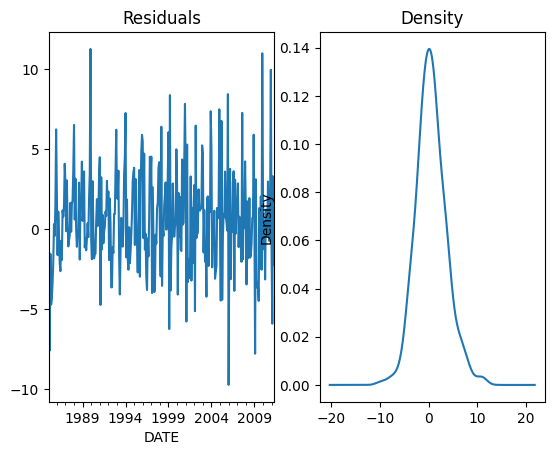

In [17]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(title = 'Density', kind= 'kde', ax = ax[1])
plt.show()

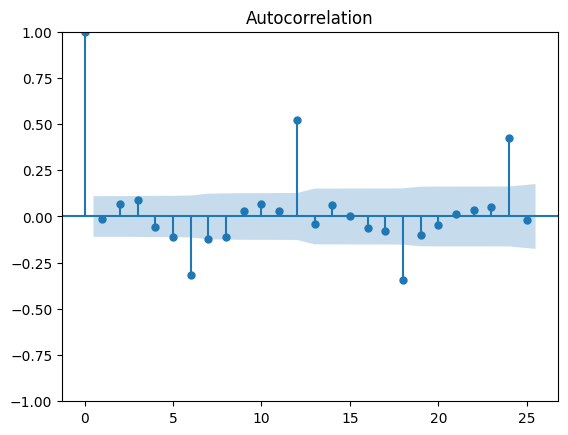

In [18]:
acf_res = plot_acf(residuals)

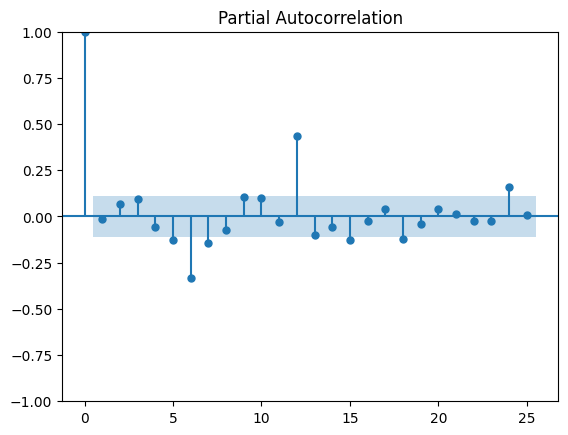

In [19]:
pacf_res = plot_pacf(residuals)

<Axes: xlabel='DATE'>

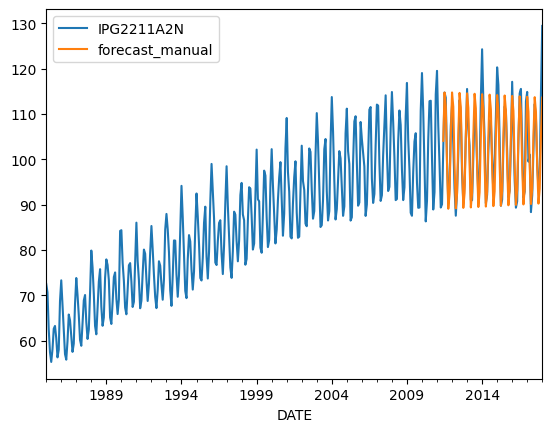

In [20]:
forecast_test = model_fit.forecast(len(test_df))

df['forecast_manual'] = [None]*len(train_df) + list(forecast_test)

df.plot()

In [21]:
import pmdarima as pm

auto_arima = pm.auto_arima(train_df, stepwise=False, seasonal=True)
auto_arima

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [22]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  317
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -862.105
Date:                Fri, 30 Jun 2023   AIC                           1736.209
Time:                        11:52:33   BIC                           1758.744
Sample:                    01-01-1985   HQIC                          1745.212
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1436      0.027      5.277      0.000       0.090       0.197
ar.L1          0.7596      0.066     11.516      0.000       0.630       0.889
ar.L2         -0.6500      0.057    -11.359      0.000      -0.762      -0.538
ar.L3         -0.1948      0.060     -3.244      0.001      -0.313      -0.077
ma.L1         -0.9007      0.027    -33.881      0.000      -0.953      -0.849
sigma2        13.5262      1.080     12.521      0.000      11.409      15.644
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 7.20
Prob(Q):                              0.68   Prob(JB):                         0.03
Heteroskedasticity (H):               1.94   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='DATE'>

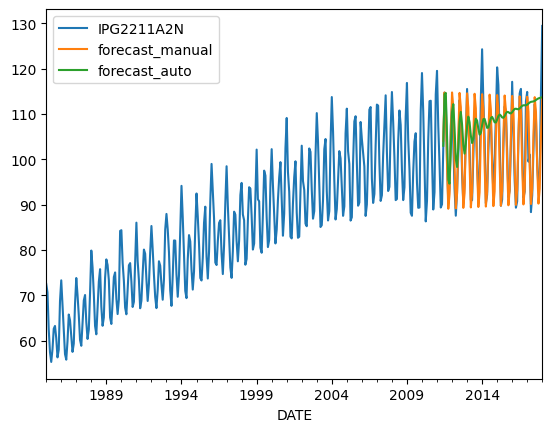

In [24]:
forecast_test_auto = auto_arima.predict(n_periods=len(test_df))
df['forecast_auto'] = [None]*len(train_df) + list(forecast_test_auto)

df.plot()




In [25]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print("Manual: \n")
print(f"mape: {mean_absolute_percentage_error(test_df, forecast_test)}")
print(f"mse: {mean_squared_error(test_df, forecast_test)}")
print(f"mae: {mean_absolute_error(test_df, forecast_test)}")

Manual: 

mape: 0.029315229985632435
mse: 17.42027042480524
mae: 3.098744292845651


In [26]:
print("Auto: \n")
print(f"mape: {mean_absolute_percentage_error(test_df, forecast_test_auto)}")
print(f"mse: {mean_squared_error(test_df, forecast_test_auto)}")
print(f"mae: {mean_absolute_error(test_df, forecast_test_auto)}")

Auto: 

mape: 0.08940104102672647
mse: 119.33253880516413
mae: 8.722800983343252


### functions in arima class:

- fit model (auto arima if order is None)
- test stationarity
- acf, pacf plot
- differencing + acf/pacf/stationarity
- plot series
- plot forecast w/ test
    